## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

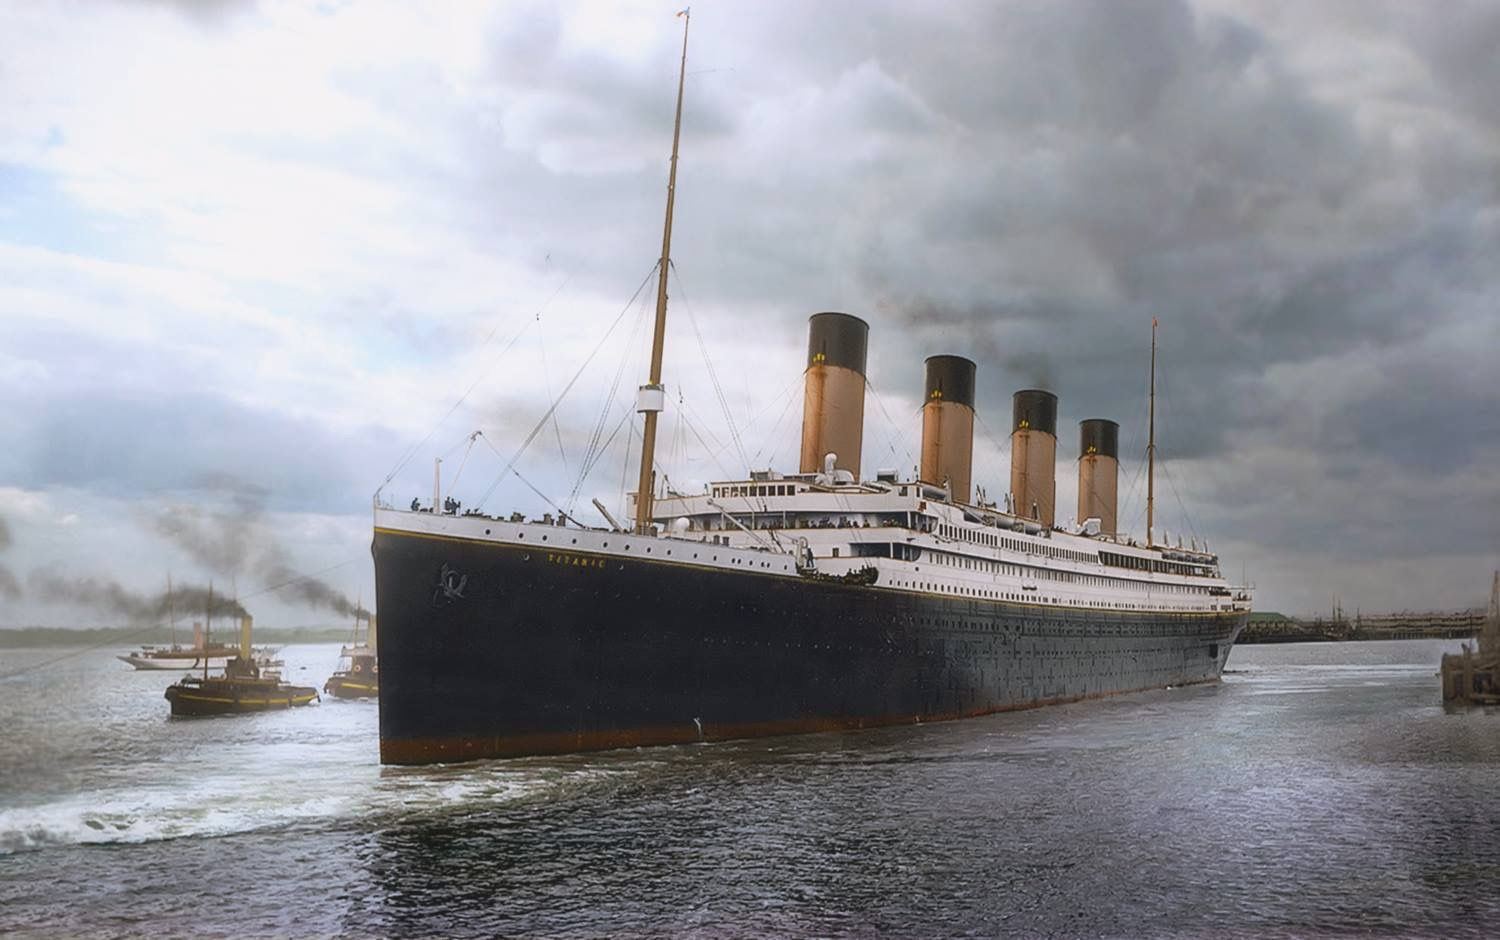
# RMS Titanic

## Punktualnie w południe 10 kwietnia 1912 r. długi i głęboki ryk syren „Titanica” dał znać, że nadszedł czas wypłynięcia. Był to znak dla holowników, by stanęły w dryf. Wydano rozkaz „Cała naprzód!”, a gdy trzy potężne śruby zaczęły się obracać, „Titanic” z wolna ruszył. Zaczął się dziewiczy los tego potężnego transatlantyka.

## Na pokładzie znajdowało się 2208 osób z różnych klas społecznych. Niektórzy wybierali się na wycieczkę dla innych to miał być początek nowego życia a dla załogi czas pracy ... los jednak chciał inaczej.

In [72]:
# ładujemy potrzebne na biblioteki do analizy danych

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('26__titanic.csv', sep=",")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [75]:
# na pierwszy rzut oka widać że mamy brakujące dane ale sprawdzmy jakie i ile

In [76]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


## Jako że główne dane są prawie komletne skupmy się na analizie przerzywalności.

In [77]:
# sprawdzamy czy mamy duplikaty danych

In [78]:
df.duplicated ()

0       False
1       False
2       False
3       False
4       False
        ...  
1305    False
1306    False
1307    False
1308    False
1309    False
Length: 1310, dtype: bool

In [79]:
# sprawdzamy ilośc pasażerów w poszczególnych klasach

In [80]:
df ['pclass'].value_counts ()

3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64

### Już na tym etapie widzimy że ponad połowa pasażerów była z klasy niższej.

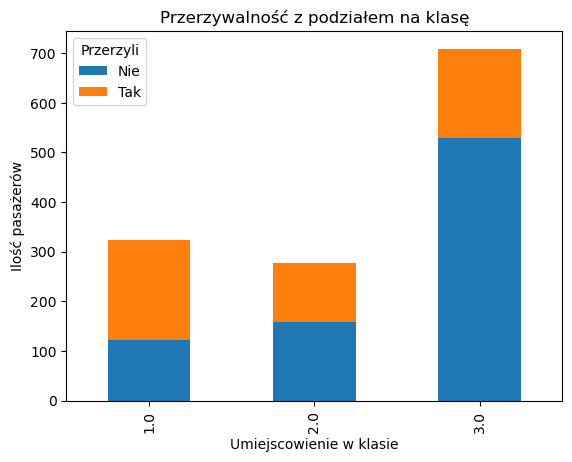

In [81]:
df_cleaned = df.dropna(subset=['pclass', 'survived'])

# grupujemy aby policzyć wystapienie z podziaem na klasę i przerzywalność
grouped_data = df_cleaned.groupby(['pclass', 'survived']).size().unstack()

# budujemy wykres
fig, ax = plt.subplots()
grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Przerzywalność z podziałem na klasę')
ax.set_xlabel('Umiejscowienie w klasie')
ax.set_ylabel('Ilość pasażerów')
ax.legend(title='Przerzyli', labels=['Nie', 'Tak'])

## Potwierdziliśmy że umiejscowienie klas społecznych na statku miało kolosalny wpływ na przerzycie podczas katastrofy.

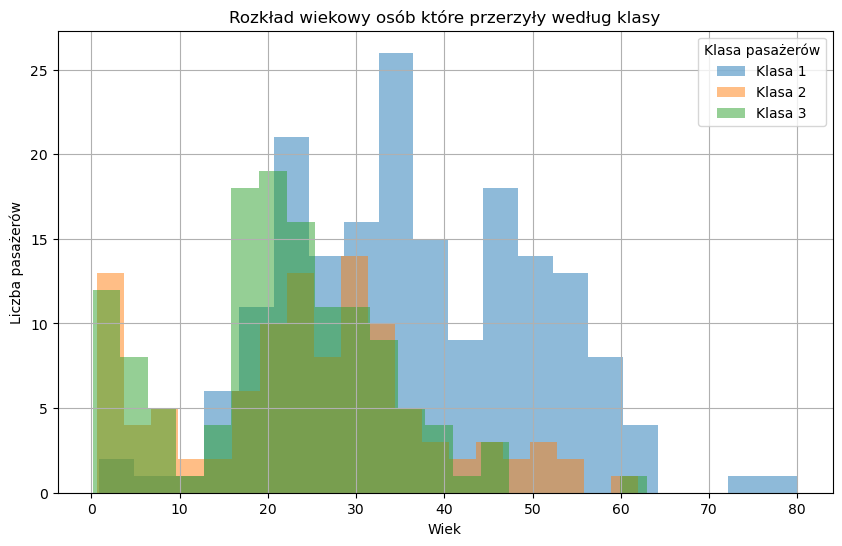

In [97]:
filtered_df = df.dropna(subset=['survived', 'age', 'pclass', 'boat'])

# budujemy histogram
plt.figure(figsize=(10, 6))
for pclass in sorted(filtered_df['pclass'].unique()):
    subset = filtered_df[filtered_df['pclass'] == pclass]
    plt.hist(subset['age'], bins=20, alpha=0.5, label=f'Klasa {int(pclass)}')

plt.title('Rozkład wiekowy osób które przerzyły według klasy')
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')
plt.legend(title='Klasa pasażerów')
plt.grid(True)

## Na tym etapie widzimy że klasy 2 i 3 mają podobną charaketystykę przerzycia co do wieku jak i to że w klasie wyższej przeżyła grupa ludzi w przedziale od 20-55 lat gdy klasy niższe oscylują około 35 lat.

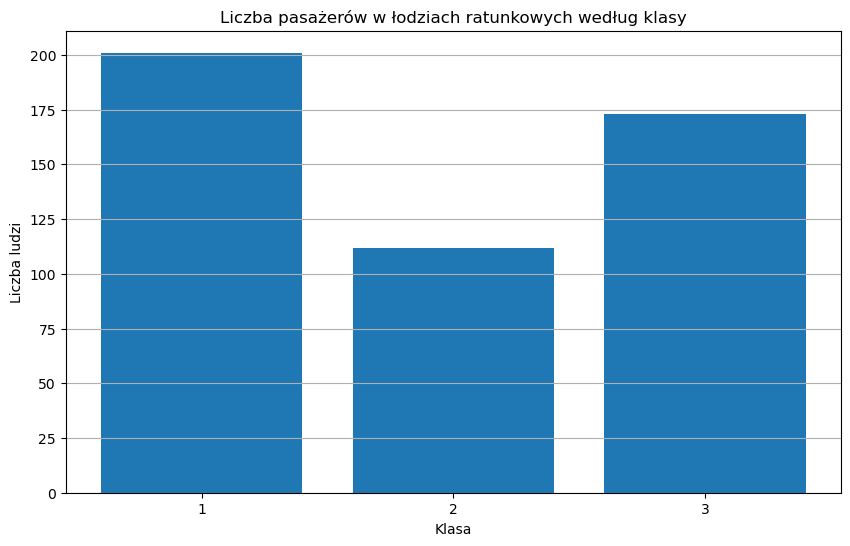

In [101]:
lifeboat_passengers = df[df['boat'].notna()]

# budujemy histogram w oparciu o ilośc ludzi według klasy
plt.figure(figsize=(10, 6))
plt.hist(lifeboat_passengers['pclass'].dropna(), bins=[1, 2, 3, 4], align='left', rwidth=0.8)
plt.title('Liczba pasażerów w łodziach ratunkowych według klasy')
plt.xlabel('Klasa')
plt.ylabel('Liczba ludzi')
plt.xticks([1, 2, 3])
plt.grid(axis='y')

## Po wykresie widać że klasa pierwsza zajęła wiekszą część szalup niestety klasa druga ucierpiała najbardziej.

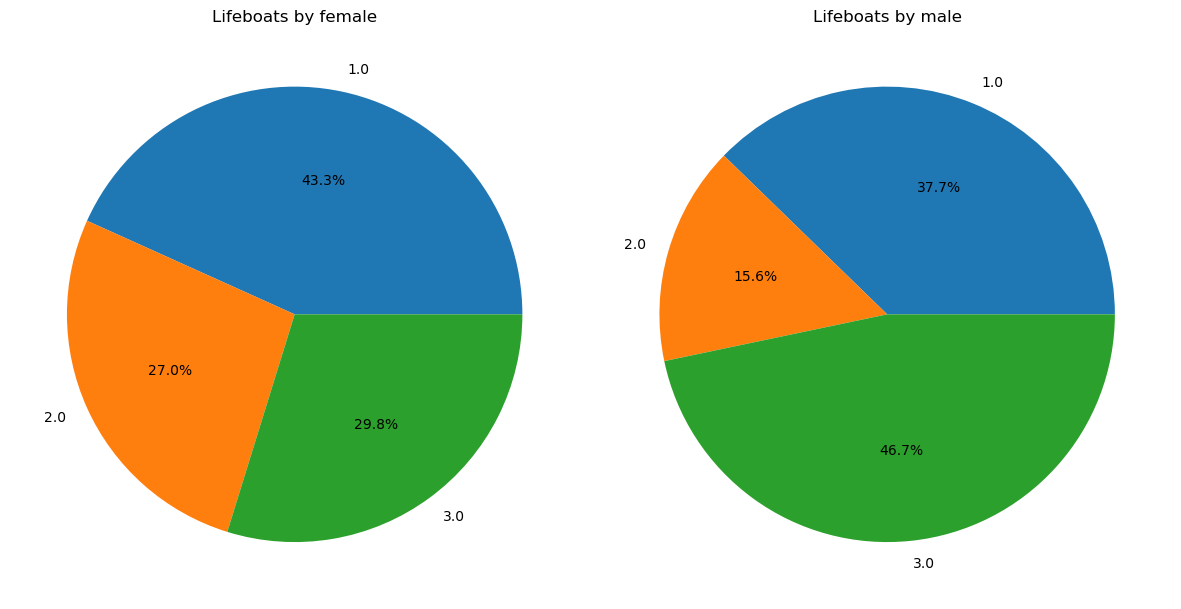

In [98]:
df_with_boats = df.dropna(subset=['boat'])
grouped_data = df_with_boats.groupby(['pclass', 'sex']).size().unstack()

fig, axes = plt.subplots(1, len(grouped_data.columns), figsize=(12, 6))

for i, (col, ax) in enumerate(zip(grouped_data.columns, axes)):
    grouped_data[col].plot(kind='pie', autopct='%1.1f%%', ax=ax, legend=False)
    ax.set_ylabel('')  # Remove the y-label
    ax.set_title(f'Lifeboats by {col}')

plt.tight_layout()

## Na tym wykresie przedstawiliśmy procentowy rozkład ludzi wedłóg klasy i płci na łodziach ratunkowych. Widać dominację klasy pierwszej niestety najmniejszą grupą to druga.

# Wnioski końcowe :

## Była to tragiczna katastrofa w której zginęł wiele osób w różnym wieku. Udowodniśmy że miejsce na statku klas społecznych miało fundamentalne znaczenie na przerzycie.

# I tak w klasie :
- pierwszej z 323 pasażerów przeżyło ponad 200 osó z czego wiekszość to kobiety,
- drugiej z 277 pasażerów przeżyło ponad 100 osób z czego większość to kobiety,
- trzeciej z 709 pasażerów przerzyło około 175 osób z czego większość to mężczyźni.

## Dane uzmysłowiły nam iż najbardziej ucierpiała klasa niższa.

## Krótko przed godziną 23:40 14 kwietnia 1912 r. marynarze z bocianiego gniazda, zauważyli na wprost statku odcinający się na rozgwieżdżonym niebie czarny zarys – górę lodową. Był to początek końca dziewiczego rejsu RMS Titanic który pochłonął wiele istnień ludzkich.

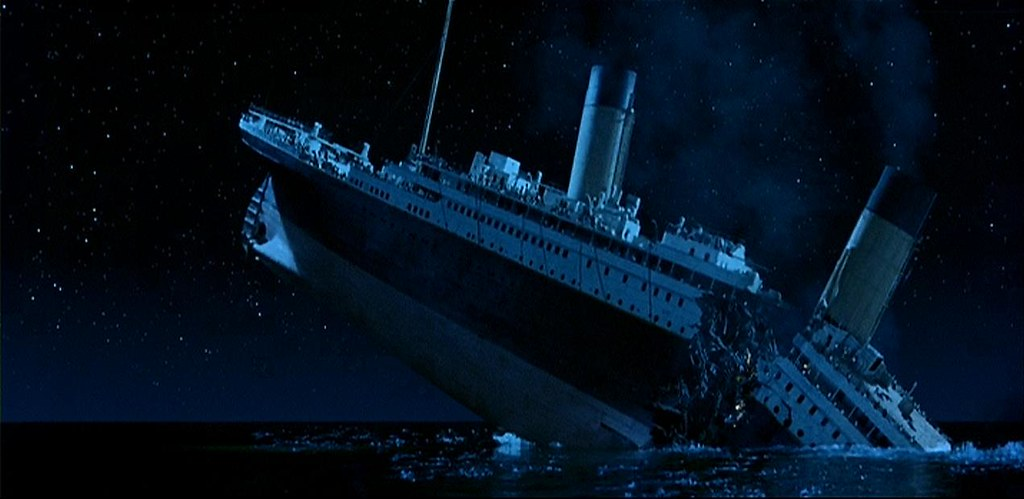

## Naukowcy spekulują odnośnie przyczyn wypadku ale wyniki są niejednoznaczne.

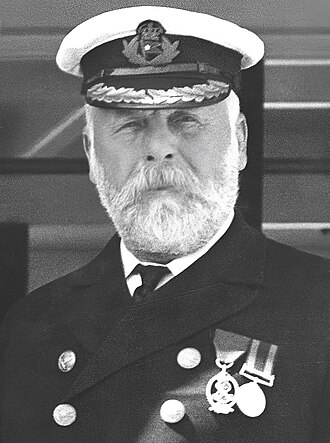
## Kapitan Edward John Smith nie opuścił statku. 

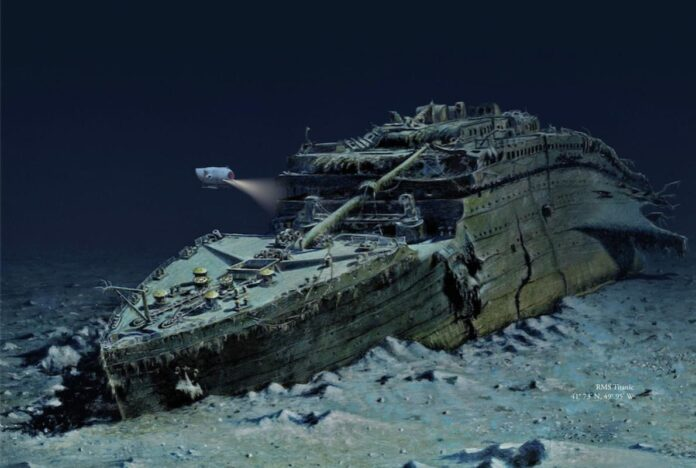